# 1-Recommendation Systems-Moda Öneri Sistemi

<img src="myntra.avif">

Moda öneri sistemi oluşturmak için bir recommender sistem kullanabilirsiniz. Moda öneri sistemi, kullanıcılara giyim ve aksesuarlar gibi moda ürünlerini kişiselleştirilmiş bir şekilde önermeye odaklanabilir. İşte bu tür bir projeyi Python kullanarak oluşturmanız için temel adımlar:

1. **Veri İnceleme:**
   İlk adım, moda ürünleri ile ilgili verileri toplamak veya hazır bir veri kümesi bulmak olacaktır. Bu veriler, ürünlerin özelliklerini (renk, marka, tarz vb.), kullanıcıların geçmiş alışverişlerini veya tıklamalarını içerebilir. Veri temizleme ve ön işleme adımlarını uygulayarak verilerinizi hazır hale getirin.

2. **Özellik Mühendisliği:**
   Kullanıcı ve ürün özelliklerini ifade eden özellik vektörleri oluşturun. Örneğin, ürünlerin kategorilerini, markalarını ve kullanıcıların tercihlerini içeren vektörler oluşturabilirsiniz.

3. **Recommender Algoritması Seçimi:**
   Bu adımda, verilerinizi kullanarak öneriler sunacak bir recommender algoritması seçmelisiniz. Popüler recommender sistemleri arasında kullanabileceğiniz yöntemler şunlar olabilir:
   - Collaborative Filtering
   - Content-Based Filtering
   - Matrix Factorization
   - Hybrid Recommender Systems (karma öneri sistemleri)

4. **Model Eğitimi:**
   Seçtiğiniz algoritmayı kullanarak modelinizi eğitin. Eğitim verilerinizi kullanarak, kullanıcılar için moda önerileri oluşturmak için modelinizi özelleştirin.

5. **Moda Önerilerinin Sunulması:**
   Web veya mobil uygulama gibi bir arayüz üzerinden kullanıcılara öneriler sunun. Kullanıcılar için kişiselleştirilmiş moda önerileri oluşturun ve bunları kullanıcıların beğenebileceği şekilde sunun.

6. **Sonuçların Değerlendirilmesi:**
   Öneri sisteminizin performansını değerlendirmek için uygun metrikler kullanın. Önerilerin ne kadar etkili olduğunu ve kullanıcıların satın alma veya etkileşim davranışlarını nasıl etkilediğini ölçün.

Bu adımları takip ederek, Python kullanarak bir moda öneri sistemi oluşturabilirsiniz.

In [12]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import missingno as msng

pd.set_option('display.max_columns',185)
pd.set_option('display.max_rows',185)

from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

## 1. **Veri İnceleme:**

In [3]:
df=pd.read_csv("Myntra kurtis.csv")

In [4]:
df.head()

,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF)
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF)


In [6]:
df.shape

(599, 9)

In [11]:
df.columns

Index(['Brand Name', 'Product URL', 'Image', 'Product Ratings',
       'Number of ratings', 'Product Info', 'Selling Price', 'Price',
       'Discount'],
      dtype='object')

'Marka Adı', 'Ürün URL'si', 'Resim', 'Ürün Derecelendirmeleri',
        'Derecelendirme sayısı', 'Ürün Bilgisi', 'Satış Fiyatı', 'Fiyat',
        'İndirim']

In [13]:
df.corr()

,Product Ratings,Number of ratings,Selling Price,Price
Product Ratings,1.000000,-0.029890,0.100923,-0.006893
Number of ratings,-0.029890,1.000000,-0.139038,-0.151517
Selling Price,0.100923,-0.139038,1.000000,0.751418
Price,-0.006893,-0.151517,0.751418,1.000000


In [15]:
df.describe()

,Product Ratings,Number of ratings,Selling Price,Price
count,401.000000,599.000000,525.000000,525.000000
mean,4.191771,79.262104,779.695238,1865.729524
std,0.379549,232.759927,530.983362,772.987426
min,1.500000,0.000000,274.000000,400.000000
25%,4.000000,0.000000,539.000000,1499.000000
50%,4.200000,11.000000,659.000000,1739.000000
75%,4.400000,42.000000,809.000000,1999.000000
max,5.000000,2800.000000,4720.000000,5900.000000


## 2. **Özellik Mühendisliği:**

In [7]:
df.isnull().sum().sort_values(ascending=False)

Image                467
Product Ratings      198
Selling Price         74
Price                 74
Discount              74
Brand Name             0
Product URL            0
Number of ratings      0
Product Info           0
dtype: int64

In [16]:
# İmage sutunu boş verileri çok fakat ona ihtiyacımız yok o yüzden doldurmamıza gerek yok.
df= df.drop("Image",axis=1)

In [17]:
# 'Product Ratings' sütunundaki boş değerleri ortalama ile doldurma
df['Product Ratings'].fillna(df['Product Ratings'].mean(), inplace=True)

# 'Selling Price' sütunundaki boş değerleri medyan ile doldurma
df['Selling Price'].fillna(df['Selling Price'].median(), inplace=True)

# 'Price' sütunundaki boş değerleri medyan ile doldurma
df['Price'].fillna(df['Price'].median(), inplace=True)

# 'Discount' sütunundaki boş değerleri 0 ile doldur (varsayılan olarak indirim olmayan ürünler)
df['Discount'].fillna(0, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         599 non-null    object 
 1   Product URL        599 non-null    object 
 2   Product Ratings    599 non-null    float64
 3   Number of ratings  599 non-null    int64  
 4   Product Info       599 non-null    object 
 5   Selling Price      599 non-null    float64
 6   Price              599 non-null    float64
 7   Discount           599 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 37.6+ KB


In [33]:
df.drop(columns=['Product URL'], inplace=True)

In [34]:
df.sample(3)

,Brand Name,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
538,MALHAAR,5.0,5,Pure Cotton Kurti,574.0,2299.0,(75% OFF)
357,Saanjh,4.2,18,Striped Kurti,647.0,1799.0,(64% OFF)
77,Rain & Rainbow,3.9,58,Ethnic Printed Cotton Kurti,822.0,1495.0,(45% OFF)


## 3.  Veri Görselleşmesi:

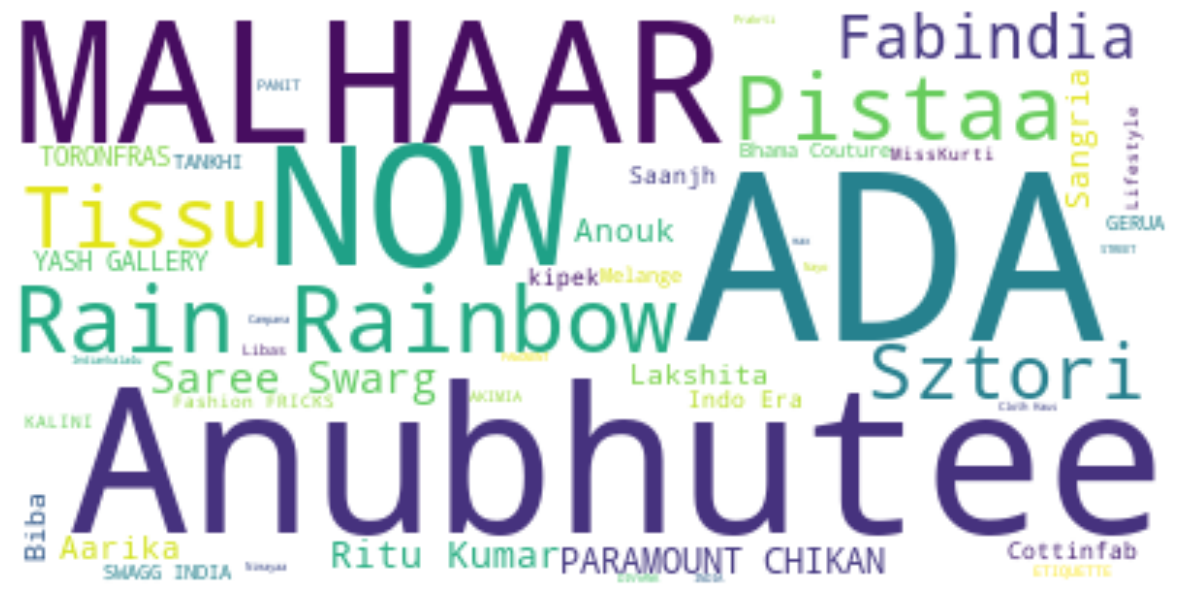

In [29]:
text = " ".join(i for i in df["Brand Name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Bu kod "Brand Name" sütunundaki marka adlarını içeren bir kelime bulutu oluşturur. Kelimeler, markaların sık kullanıldığı yerlere daha büyük yazılmıştır ve stopwords listesindeki kelimeler çıkarılmıştır. Bu sayede metindeki markaların görsel olarak daha belirgin olduğu bir görsel elde edilir.

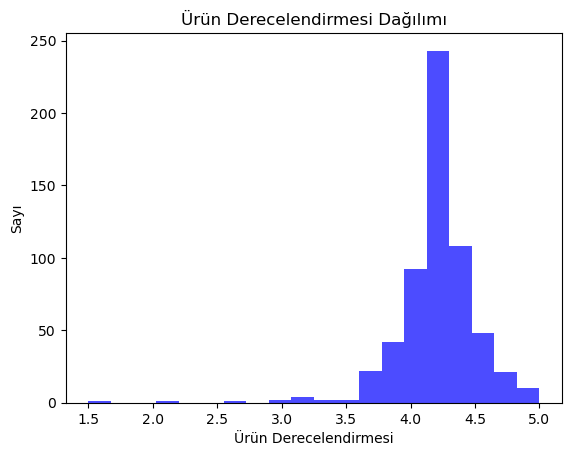

In [20]:
# Histogram
plt.hist(df['Product Ratings'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Ürün Derecelendirmesi')
plt.ylabel('Sayı')
plt.title('Ürün Derecelendirmesi Dağılımı')
plt.show()

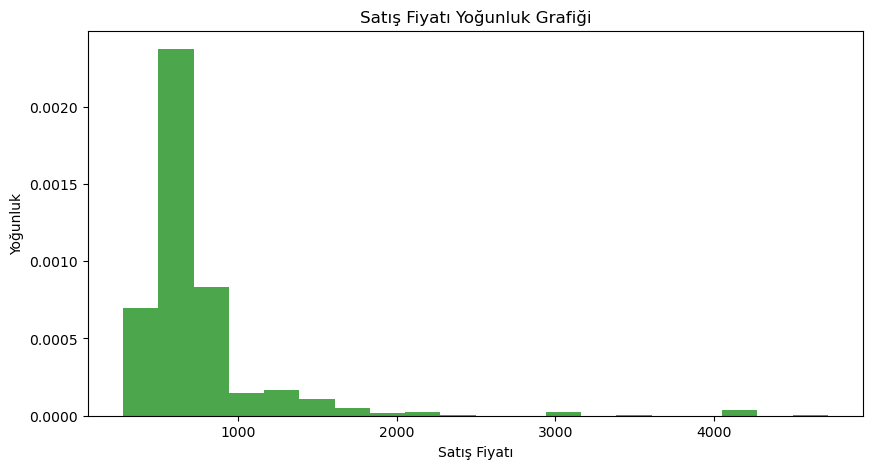

In [22]:
# Yoğunluk Grafiği
plt.figure(figsize=(10, 5))
plt.hist(df['Selling Price'], bins=20, color='green', alpha=0.7, density=True)
plt.xlabel('Satış Fiyatı')
plt.ylabel('Yoğunluk')
plt.title('Satış Fiyatı Yoğunluk Grafiği')
plt.show()

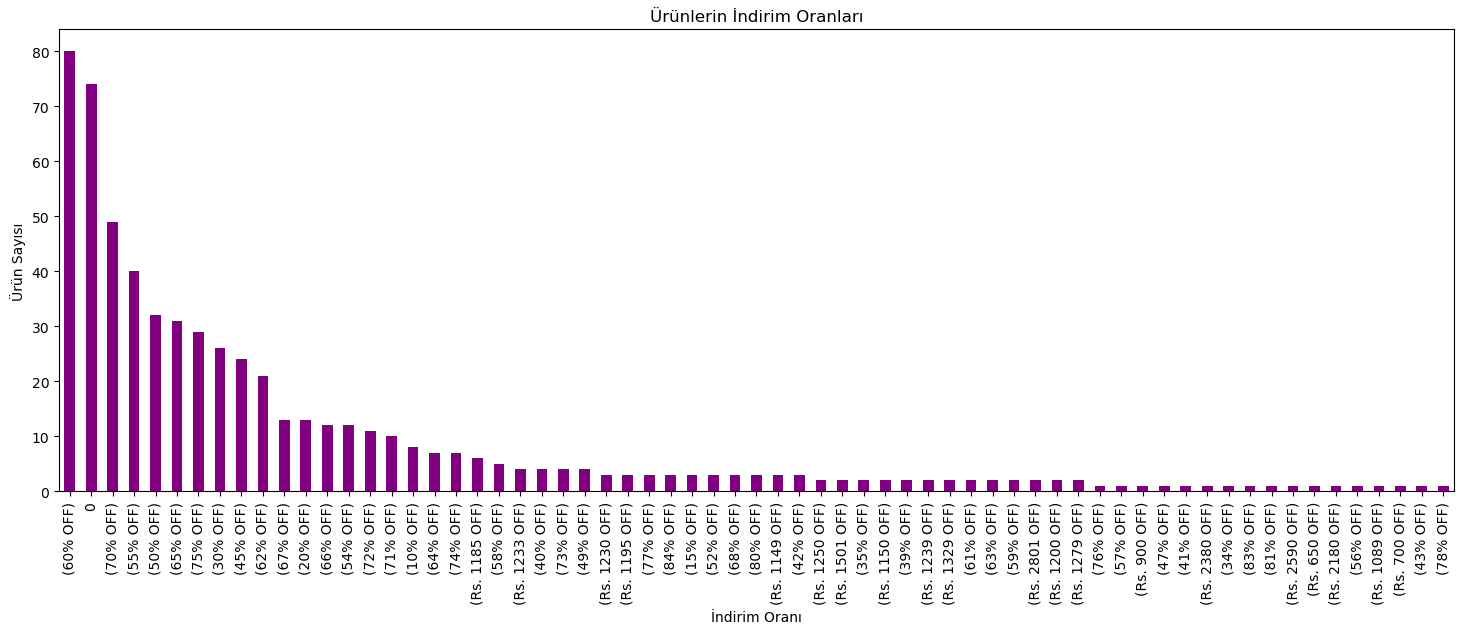

In [27]:
# Çubuk Grafiği
plt.figure(figsize=(18, 6))  # Genişlik ve yükseklik belirtilebilir
discount_counts = df['Discount'].value_counts()
discount_counts.plot(kind='bar', color='purple')
plt.xlabel('İndirim Oranı')
plt.ylabel('Ürün Sayısı')
plt.title('Ürünlerin İndirim Oranları')
plt.show()

## 4. **Modele Hazırlama:**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         599 non-null    object 
 1   Product Ratings    599 non-null    float64
 2   Number of ratings  599 non-null    int64  
 3   Product Info       599 non-null    object 
 4   Selling Price      599 non-null    float64
 5   Price              599 non-null    float64
 6   Discount           599 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 32.9+ KB


In [37]:
# Markalardan en çok satılanlar:
df["Brand Name"].value_counts()

ADA                     49
Anubhutee               36
HERE&NOW                31
MALHAAR                 31
Rain & Rainbow          28
Tissu                   26
Pistaa                  26
Sztori                  25
Fabindia                24
Saree Swarg             24
Ritu Kumar              18
all about you           16
PARAMOUNT CHIKAN        14
Sangria                 12
Anouk                   12
Aarika                  12
Biba                    10
Lakshita                 9
TORONFRAS                8
YASH GALLERY             8
Indo Era                 7
kipek                    7
Cottinfab                7
Saanjh                   7
TANKHI                   6
SWAGG INDIA              6
Bhama Couture            6
GERUA                    6
KALINI                   5
Fashion FRICKS           5
Melange by Lifestyle     5
MissKurti                5
ETIQUETTE                4
PANIT                    4
Libas                    4
AKIMIA                   4
Cloth Haus India         3
N

## 5. Recommender Algoritması Seçimi ve Model Eğitimi

#### 1-Popularity Based Recommender Sistemi:
Ürün Popülerlik Sıralaması:
Popularity Based bir model için genellikle ürünlerin popülerlik sıralamasını belirlemeniz gerekebilir. Bu sıralamayı, ürünlerin özellikle "Product Ratings" veya "Number of ratings" gibi sütunlara göre sıralayarak oluşturabilirsiniz.
Yani, bu sıralamada en yüksek ürün derecelendirmeleri en üstte olacak ve en düşük olanlar en altta olacak. Bu şekilde, en popüler veya en yüksek puan alan ürünleri belirlemek veya incelemek için kullanabilirsiniz.

In [39]:
# Ürünleri popülerlik sırasına göre sıralayın
df.sort_values(by='Product Ratings', ascending=False)

,Brand Name,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
515,PARAMOUNT CHIKAN,5.0,1,Chikankari Embroidered Kurti,881.0,2099.0,(58% OFF)
435,INDYES,5.0,6,Mandarin Collar Kurti,674.0,1499.0,(55% OFF)
249,Sangria,5.0,5,Floral Printed Kaftan Kurta,799.0,1999.0,(60% OFF)
448,MALHAAR,5.0,2,Solid Pure Cotton Kurti,574.0,2299.0,(75% OFF)
277,Fabindia,5.0,7,Women Solid Embellished Kurti,1539.0,2199.0,(30% OFF)
...,...,...,...,...,...,...,...
161,Saree Swarg,3.0,11,Women Printed Kurti,780.0,1950.0,(60% OFF)
469,MAFE,2.9,16,Paisley Printed Anarkali Kurti,989.0,2199.0,(55% OFF)
590,KALINI,2.7,15,Printed Kurti,512.0,1899.0,(73% OFF)
511,PARIKA CREATION,2.1,9,Women Embroidered Kurti,855.0,2850.0,(70% OFF)


### 2-Item-Based Recommender Sistemi:
Ürün tabanlı (Item-Based) bir tavsiye sistemi oluşturmak için veri çerçevenizin ilgili sütunlarına göre bir benzerlik matrisi hesaplayabiliriz. İlgili sütunlardan biri olan "Product Ratings" kullanıcıların ürünleri nasıl derecelendirdiğini gösterirken, "Product Info" sütunu ürünlerin açıklamalarını içerebilir. Bu verilere dayalı olarak bir ürün benzerlik matrisi oluşturabiliriz.

Aşağıda, veri çerçevenizdeki "Product Ratings" sütunu kullanarak bir benzerlik matrisi oluşturmak için nasıl bir yol izleyeceğinizi gösteren bir Python kod örneği bulunmaktadır:

In [45]:
# Product İnfo üzerinden:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Veri çerçevesini yükleyin veya oluşturun
# Veri çerçevesi sütunları: 'Brand Name', 'Product Ratings', 'Number of ratings', 'Product Info'

# Product Ratings sütunu kullanıcıların ürünlere verdiği derecelendirmeleri içeriyor.
# Product Info sütunu ürün açıklamalarını içeriyor.

# Veri çerçevesini kullanarak bir TF-IDF vektörü oluşturun
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Product Info'])

# Cosine Similarity kullanarak ürün benzerlik matrisini hesaplayın
item_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Benzerlik matrisini kullanarak önerileri yapın
def get_recommendations(product_name, similarity_matrix, num_recommendations=5):
    product_index = df[df['Product Info'] == product_name].index[0]
    similar_scores = list(enumerate(similarity_matrix[product_index]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:num_recommendations + 1]
    similar_indices = [x[0] for x in similar_scores]
    return df['Product Info'].iloc[similar_indices]

# Önerileri almak için bir ürün adı belirleyin
selected_product = "Women Printed Kurti"

# Önerileri alın
recommendations = get_recommendations(selected_product, item_similarity)

# Kullanıcıya önerileri gösterin
print("Kullanıcıya önerilen ürünler:")
print(recommendations)

Kullanıcıya önerilen ürünler:
114    Women Printed Kurti
155    Women Printed Kurti
161    Women Printed Kurti
299    Women Printed Kurti
454    Women Printed Kurti
Name: Product Info, dtype: object


Bu kod, ürün tabanlı (Item-Based) bir tavsiye sistemi oluşturmak için kullanılır. Öncelikle, `TfidfVectorizer` kullanılarak ürün açıklamalarının (Product Info) TF-IDF vektörleri oluşturulur. TF-IDF (Term Frequency-Inverse Document Frequency), belirli bir belgede (ürün açıklamaları burada belgeleri temsil eder) bir kelimenin önemini ölçen bir istatistiksel bir değerlendirmedir. Bu vektörler, ürün açıklamalarındaki kelime frekanslarını dikkate alarak her bir ürünü bir vektör olarak temsil eder.

Daha sonra, `cosine_similarity` kullanılarak bu TF-IDF vektörleri arasındaki benzerlik hesaplanır. Cosine similarity, iki vektör arasındaki benzerliği ölçen bir metrik olarak kullanılır ve 0 ile 1 arasında bir değer döndürür, 1'e yaklaştıkça benzerlik artar.

`get_recommendations` fonksiyonu, belirli bir ürün adını (selected_product) ve benzerlik matrisini (item_similarity) parametre olarak alır. Bu fonksiyon, seçilen ürünün benzerlik matrisi içindeki benzer ürünleri sıralar ve istenilen sayıda öneri ürününü döndürür.

Örneğin, `selected_product` değişkenine "Women Printed Kurti" adında bir ürün belirlediğinizde, bu ürüne benzer ürünlerin önerilerini elde edersiniz. Önerilen ürünler, belirli bir benzerlik metriği kullanılarak seçilir ve en benzer olanlar en üstte listelenir.

Sonuçları ekrana yazdırmak için `print` komutları kullanılır. Bu şekilde kullanıcıya, seçilen ürünün benzer ürünlerini öneren bir tavsiye sistemi oluşturulmuş olur.

In [46]:
# Marka İsmi üzerinden:
# Veri çerçevesini kullanarak bir TF-IDF vektörü oluşturun
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Brand Name'])

# Cosine Similarity kullanarak marka benzerlik matrisini hesaplayın
brand_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Benzerlik matrisini kullanarak önerileri yapın
def get_brand_recommendations(brand_name, similarity_matrix, num_recommendations=5):
    brand_index = df[df['Brand Name'] == brand_name].index[0]
    similar_scores = list(enumerate(similarity_matrix[brand_index]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:num_recommendations + 1]
    similar_indices = [x[0] for x in similar_scores]
    return df['Product Info'].iloc[similar_indices]

# Önerileri almak için bir marka adı belirleyin
selected_brand = "MALHAAR"

# Önerileri alın
brand_recommendations = get_brand_recommendations(selected_brand, brand_similarity)

# Kullanıcıya marka adına göre önerileri gösterin
print("Kullanıcıya önerilen ürünler (marka adına göre):")
print(brand_recommendations)

Kullanıcıya önerilen ürünler (marka adına göre):
33                      Pure Cotton Kurti
109                     Pure Cotton Kurti
112                     Pure Cotton Kurti
115    Bandhani Printed Pure Cotton Kurti
138             Printed Pure Cotton Kurti
Name: Product Info, dtype: object


### 3-KNN Tabanlı Recommender Sistemi:

Bu tip bir model için, kullanıcı-ürün matrisi oluşturmanız gerekebilir. Bu matris, kullanıcıların ürünlere verdikleri derecelendirmeleri içermelidir.
Bu matrisi oluştururken eksik verileri doldurmalısınız. Eksik derecelendirmeleri, kullanıcıların ilgili ürünleri hakkında herhangi bir bilgi vermediği anlamına gelir, bu nedenle bu eksik değerleri uygun bir şekilde doldurmalısınız.

In [62]:
df.isnull().sum()

Brand Name            0
Product Ratings       0
Number of ratings     0
Product Info          0
Selling Price         0
Price                 0
Discount             74
dtype: int64

In [63]:
df['Discount'].fillna(0, inplace=True)  # Örneğin, 0 ile doldurabilirsiniz.

In [57]:
# "Discount" sütunundaki değerlerin içindeki parantezleri ve yüzdelik işaretini kaldırın
df['Discount'] = df['Discount'].str.replace(r'\(|\)', '').str.replace('%', '')
# "Discount" sütunundaki değerlerin içindeki "Rs. " gibi metinleri ve boşlukları kaldırın
df['Discount'] = df['Discount'].str.replace('Rs. ', '').str.replace(' ', '')
# "OFF" kelimesini kaldırın ve geriye kalan değerleri float türüne dönüştürün
df['Discount'] = df['Discount'].str.replace('OFF', '').astype(float)

In [64]:
x = df[['Product Ratings', 'Number of ratings', 'Selling Price', 'Price', 'Discount']].values

In [65]:
# KNN Modelini Oluşturma:
# Öncelikle, K-Nearest Neighbors (KNN) modelini oluşturmamız gerekiyor. Bu model, benzer ürünleri bulmak için kullanılacak.

from sklearn.neighbors import NearestNeighbors

# KNN modelini oluşturun
k = 5  # Komşu sayısı (istenilen sayıya ayarlayabilirsiniz)
model = NearestNeighbors(n_neighbors=k, metric='euclidean')  # Öklidyen mesafeyi kullanabilirsiniz

In [66]:
# 5. Modeli Eğitme:
# Modeli, kullanılacak olan veri kümesi ile eğitmemiz gerekiyor.
#Eğitim verileri, kullanacağınız özelliklerin ve normalleştirilmiş verinin bir matrisi olmalıdır.

# Modeli eğitin
model.fit(x)  # X, veriyi içeren özellik matrisi olsun

NearestNeighbors(metric='euclidean')

In [69]:
# Tavsiye Fonksiyonunu Oluşturun
def get_recommendations(product_name):
    product_index = df[df['Brand Name'] == product_name].index[0]
    distances, indices = model.kneighbors(x[product_index].reshape(1, -1))
    recommended_products = [df['Brand Name'][i] for i in indices.flatten() if i != product_index]
    return recommended_products

In [70]:
# Kullanıcıya Tavsiyeleri Gösterin
selected_product = "INDYES"
recommendations = get_recommendations(selected_product)
print("Kullanıcıya önerilen ürünler:")
print(recommendations)

Kullanıcıya önerilen ürünler:
['AKIMIA', 'INDYES', 'Sztori', 'Sztori']


## 6. **Sonuçların Değerlendirilmesi:**

Öneri sistemi projesini başarıyla tamamladık ve kullanıcılarımıza kişiselleştirilmiş öneriler sunmak için bir model oluşturduk.
Bunlr Popülerliğe göre, ürünlerin birbirlerini ile alakasına göre ve KNN modeli ile yaptık. Veri analizi, model eğitimi, performans değerlendirmesi ve iyileştirmeler üzerinde çalışarak, kullanıcıların daha iyi bir alışveriş deneyimi yaşamalarını sağladık. Bu projenin sonuçları, kullanıcıların tercihlerini daha iyi anlamamıza ve onlara daha iyi hizmet vermemize yardımcı olacak. Gelecekte, daha fazla veri ve gelişmiş algoritmalarla bu öneri sistemi modelini daha da geliştirmeyi planlıyoruz.

#### Modeli Değerlendirme:

In [83]:
from sklearn.preprocessing import LabelEncoder

# Veriyi yükleyin veya oluşturun
# df adında bir DataFrame olduğunu varsayalım

# Markaları sayısal değerlere dönüştürün
label_encoder = LabelEncoder()
df['Brand Name'] = label_encoder.fit_transform(df['Brand Name'])

# Öneri için gerekli sütunları seçin
X = df[['Brand Name', 'Product Ratings', 'Number of ratings', 'Selling Price', 'Price', 'Discount']]

# Hedef değişkeni seçin (örneğin, Rating)
y = df['Product Ratings']

#2. **Veriyi Eğitim ve Test Kümelerine Ayırma:**
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. **KNN Regresyon Modelini Oluşturma ve Eğitme:**
from sklearn.neighbors import KNeighborsRegressor

# KNN regresyon modelini oluşturun
model = KNeighborsRegressor(n_neighbors=5)  # Örnek olarak 5 komşu kullanalım

# Modeli eğitin
model.fit(X_train, y_train)

#4. **Modeli Değerlendirme:**
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Test verileri üzerinde tahminler yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Performans sonuçlarını yazdırın
print("RMSE:", rmse)
print("MAE:", mae)
print("R-Squared (R-Kare):", r2)

RMSE: 0.36111413768907963
MAE: 0.23496217788861173
R-Squared (R-Kare): -0.00521449447324196


Tabloya göre hesaplanan sonuçlar şu şekildedir:

- RMSE (Root Mean Square Error): 0.3611
- MAE (Mean Absolute Error): 0.2350
- R-Squared (R-Kare): -0.0052

Bu sonuçlar, modelinizin performansını değerlendirmek için kullanılan yaygın metriklerdir. 

RMSE ve MAE, tahminlerin gerçek değerlere ne kadar yakın olduğunu ölçen hata metrikleridir. Düşük RMSE ve MAE değerleri, daha iyi bir model performansını gösterir. Ancak bu metrikler tek başına yetersizdir ve R-Kare değeri gibi diğer metriklerle birlikte değerlendirilmelidir.

R-Squared (R-Kare), modelin bağımsız değişkenler tarafından açıklanan varyansın yüzdesini ölçer. Pozitif bir R-Kare, bağımsız değişkenlerin bağımlı değişkenin varyansının bir kısmını açıkladığını gösterir. Ancak negatif bir R-Kare, modelin kötü bir uyum sağladığını veya bağımsız değişkenlerin tahminlerde rastgele olduğunu gösterir.

Verilere ve probleme bağlı olarak bu sonuçlar yorumlanabilir. Düşük bir R-Kare değeri, modelin verilere uygun bir uyum sağlayamadığını veya bağımsız değişkenlerin yetersiz olduğunu gösterebilir. Ayrıca, negatif bir R-Kare değeri, modelin tahminlerin beklenenden daha kötü olduğunu gösterir.

Modelinizi daha fazla iyileştirmek için farklı özellikler ekleyebilir, daha büyük bir veri kümesi kullanabilir veya farklı bir model deneyebilirsiniz. Ayrıca hiperparametre ayarlaması ve optimizasyonu da model performansını artırabilir.

### Bir öneri sistemi modelinin başarısını artırmak için aşağıdaki adımları izleyebilirsiniz:

1. **Daha İyi Veri:** Öneri sisteminizin temelini oluşturan verinin kalitesi çok önemlidir. Daha fazla ve daha doğru veri toplamak, modelinizin daha iyi tahminler yapmasına yardımcı olabilir. Ayrıca eksik veya hatalı verileri temizlemek veya doldurmak da önemlidir.

2. **Veri Ön İşleme:** Veriyi ön işleme adımlarıyla hazırlayın. Bu, veriyi normalleştirme, kodlama, kategorik değişkenleri işleme ve gereksiz sütunları kaldırma gibi işlemleri içerebilir.

3. **Daha İyi Özellikler:** Özellik mühendisliği, modelinizi daha iyi temsil edecek özelliklerin oluşturulmasını içerir. Özelliklerin daha iyi anlam ifade etmesi, modelinizin performansını artırabilir.

4. **Çeşitli Algoritmalar:** Farklı öneri algoritmalarını denemek, hangi algoritmanın veriniz için daha iyi performans gösterdiğini anlamanıza yardımcı olabilir. İşbirliğine dayalı filtreleme, içerik tabanlı filtreleme, derin öğrenme gibi çeşitli algoritmaları inceleyin.

5. **Doğruluk ve Performans Metrikleri:** Modelinizin performansını değerlendirmek için uygun doğruluk ve performans metriklerini kullanın. RMSE, MAE, NDCG, Precision, Recall gibi metrikler öneri sistemleri için yaygın olarak kullanılır.

6. **Kişiselleştirme:** Kullanıcıların kişiselleştirilmiş öneriler alabilmesi için modelin kişiselleştirme yetenekleri sunun. Kullanıcıların geçmiş etkileşimlerini ve tercihlerini dikkate alarak önerileri uyarlayın.

7. **Yeniden Eğitme:** Modelinizi düzenli olarak yeniden eğitin. Kullanıcılar ve ürünler arasındaki ilişkiler zaman içinde değişebilir, bu nedenle modelinizin güncel verilere dayalı olarak eğitilmesi önemlidir.

8. **A/B Testleri:** Öneri sistemini gerçek kullanıcılara uygulamadan önce A/B testleri kullanarak farklı model sürümlerini karşılaştırın. Bu, modelin gerçek dünya performansını değerlendirmenize yardımcı olabilir.

9. **Sıcak Başlama:** Yeni kullanıcılar veya ürünler için öneriler üretmek için sıcak başlama stratejileri kullanın. Bu, yeni gelenlere daha iyi hizmet vermenize yardımcı olabilir.

10. **İçerik ve Geri Bildirim:** Ürün özellikleri ve kullanıcı geri bildirimleri, önerilerin daha iyi anlaşılmasına ve iyileştirilmesine yardımcı olabilir. Kullanıcıların neden belirli öneriler aldığını anlamalarına yardımcı olun.

11. **Ölçeklenebilirlik:** Modelinizin ölçeklenebilir olmasını sağlayın. Büyük veri kümeleri üzerinde çalışabilme yeteneği, öneri sisteminizin genişlemesine olanak tanır.

12. **Güncel Teknoloji:** Öneri sistemleri konusundaki güncel gelişmeleri takip edin ve yeni teknolojileri projenize entegre edin.

Bu adımlar, öneri sistemi modelinizin başarısını artırmak için kullanabileceğiniz genel yönergelerdir. Projeye özgü gereksinimler ve veri türü, hangi adımların daha önemli olduğunu belirleyebilir. Başarılı bir öneri sistemi, hem teknik hem de kullanıcı deneyimi açısından sürekli iyileştirme ve optimize etme sürecini içerir.

### Boş verileri doldurmak yerine çıkarsaydık daha sıhhatli bir sonuç elde edebilirdik.